# EDA and Modelling

## Exploratory Data Analysis (EDA)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# splitting data and model evaluation
from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# sampling
from imblearn.under_sampling import NearMiss
from collections import Counter

# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

### Load Dataset

In [2]:
df=pd.read_csv('../data/raw/Employee.csv', encoding='utf-8')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


### Label Distribution

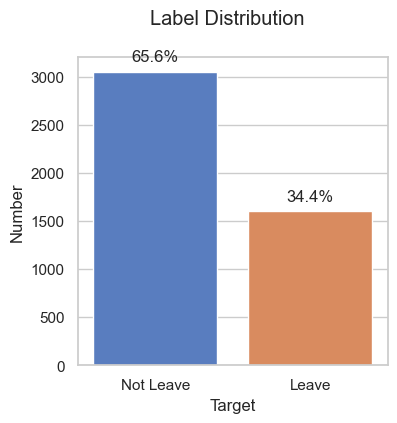

In [3]:
sns.set_theme(style="whitegrid")

chart = 'Label Distribution'

plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)

# plotting countplot based on the target variable
g = sns.countplot(x='LeaveOrNot', data=df, palette='muted')
g.set(ylabel='Number', xlabel='Target')

# customize xticks
plt.xticks([0, 1], ['Not Leave', 'Leave'], fontsize=11)

# annotate the percentage on the chart
total = len(df['LeaveOrNot'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 80), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

### Univariate Analysis

In [4]:
# parameter description
"""
Parameters:
    data (DataFrame): The input data.
    column (str): The variable to be plotted on the x-axis (or y-axis, based on the `orient` parameter).
    hue (str): The third variable to differentiate categories (optional).
    label (str): The label for the variable on the x-axis (or y-axis).
    max_sample (int): The maximum number of categories to be shown on the plot.
    num_x_ticks (int): The number of x-axis ticks to be customized.
    x_ticks (list): The list of x-axis tick labels to be customized.
    width (float): The width of the plot.
    height (float): The height of the plot.
    y_title (float): The distance between the title and the plot.
    orient (str): The orientation of the plot ('vertical' or 'horizontal').
    title (str): The title of the plot.
"""

# define a procedure to plot countplot for univariate analysis
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):
    
    # create a new figure with the specified width, height and title
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # determine the order of the categories based on the maximum sample size
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # create a countplot based on the specified orientation
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='LeaveOrNot', labels=['Not Leave', 'Leave'], fontsize=11)

    # customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # calculate the total number of observations
    total = len(data[column])

    # add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 50), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 10, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)
            
    plt.show()

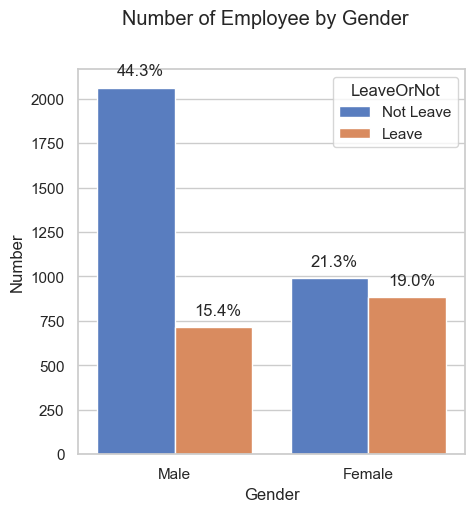

In [5]:
# initialize chart title
chart = 'Number of Employee by Gender'

# apply the procedure to plot the chart
countplot_univariate(df, 'Gender', 'LeaveOrNot', 'Gender', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

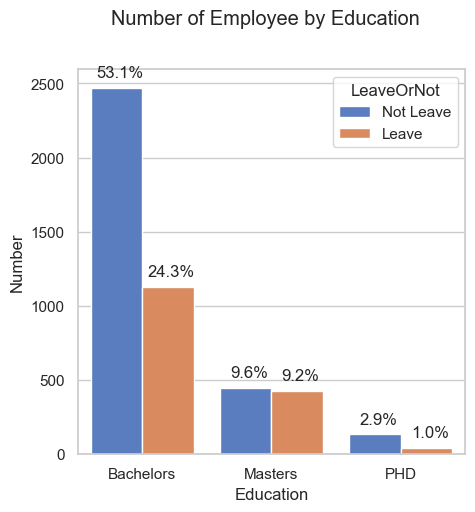

In [6]:
# initialize chart title
chart = 'Number of Employee by Education'

# apply the procedure to plot the chart
countplot_univariate(df, 'Education', 'LeaveOrNot', 'Education', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

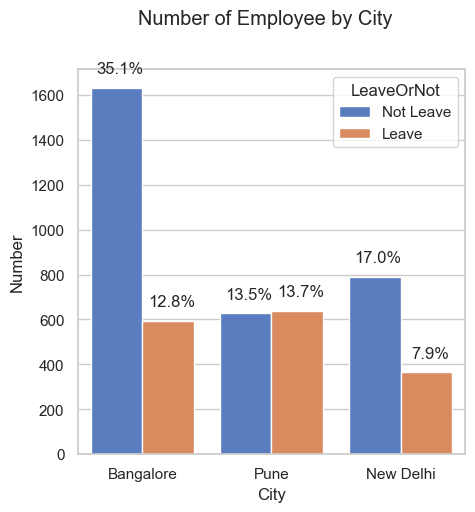

In [7]:
# initialize chart title
chart = 'Number of Employee by City'

# apply the procedure to plot the chart
countplot_univariate(df, 'City', 'LeaveOrNot', 'City', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

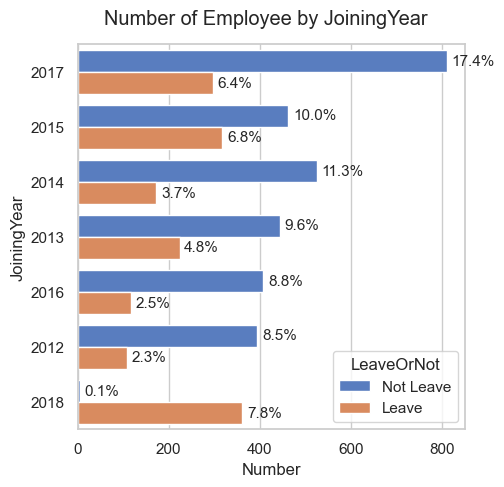

In [8]:
# initialize chart title
chart = 'Number of Employee by JoiningYear'

# apply the procedure to plot the chart
countplot_univariate(df, 'JoiningYear', 'LeaveOrNot', 'JoiningYear', 0, 0, None, 5, 5, 0.95, \
                     'horizontal', chart)

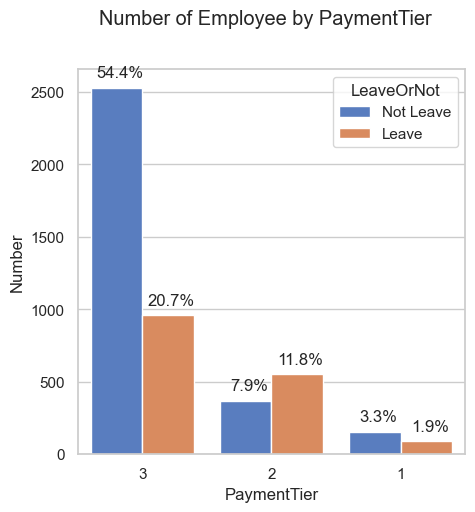

In [9]:
# initialize chart title
chart = 'Number of Employee by PaymentTier'

# apply the procedure to plot the chart
countplot_univariate(df, 'PaymentTier', 'LeaveOrNot', 'PaymentTier', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

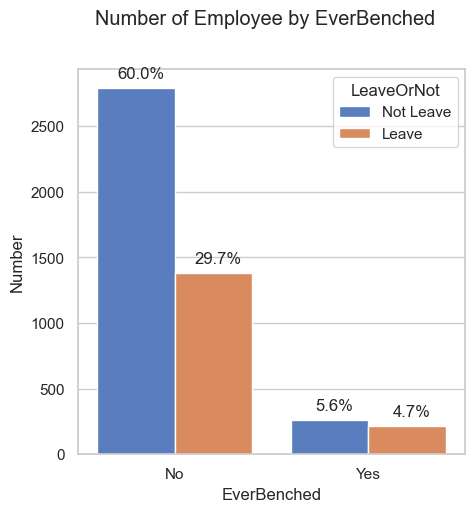

In [10]:
# initialize chart title
chart = 'Number of Employee by EverBenched'

# apply the procedure to plot the chart
countplot_univariate(df, 'EverBenched', 'LeaveOrNot', 'EverBenched', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

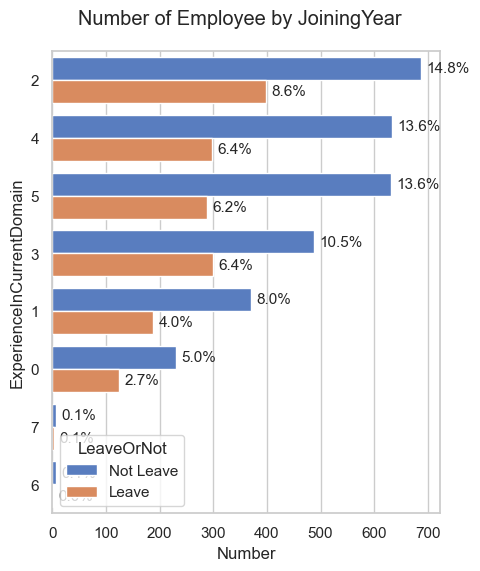

In [11]:
# initialize chart title
chart = 'Number of Employee by JoiningYear'

# apply the procedure to plot the chart
countplot_univariate(df, 'ExperienceInCurrentDomain', 'LeaveOrNot', 'ExperienceInCurrentDomain', 0, 0, None, 5, 6, 0.95, \
                     'horizontal', chart)

sns.set_theme(style="white")

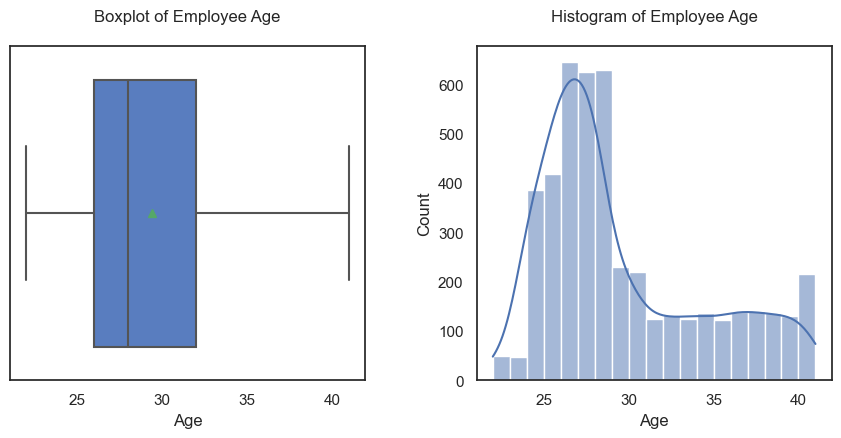

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=4)

sns.boxplot(ax=axes[0], data=df, x='Age', showmeans=True, palette='muted')
axes[0].set_title(f'Boxplot of Employee Age', y=1.05)

sns.histplot(ax=axes[1], data=df, x='Age', kde=True, binwidth=1, palette='muted')
axes[1].set_title(f'Histogram of Employee Age', y=1.05)

plt.show()

### Bivariate Analysis

In [13]:
# define a procedure to plot boxplot and histplot for bivariate analysis
def distribution_bivariate(data, x, y, hue, width, height, label):
    
    # create a new figure with the specified width and height
    fig, axes = plt.subplots(1, 2, figsize=(width, height))

    # create a boxplot based on the specified parameter
    sns.boxplot(ax=axes[0], data=data, y=y, x=x, showmeans=True, palette='muted')
    axes[0].set_title(f'Boxplot of Employee {label} by Churn Status', y=1.05)

    # create a histplot based on the specified parameter
    sns.histplot(ax=axes[1], data=data, x=y, hue=hue, kde=True, binwidth=1, multiple="stack", palette='muted')
    axes[1].set_title(f'Histogram of Employee {label} by Churn Status', y=1.05)

    plt.tight_layout()
    plt.show()

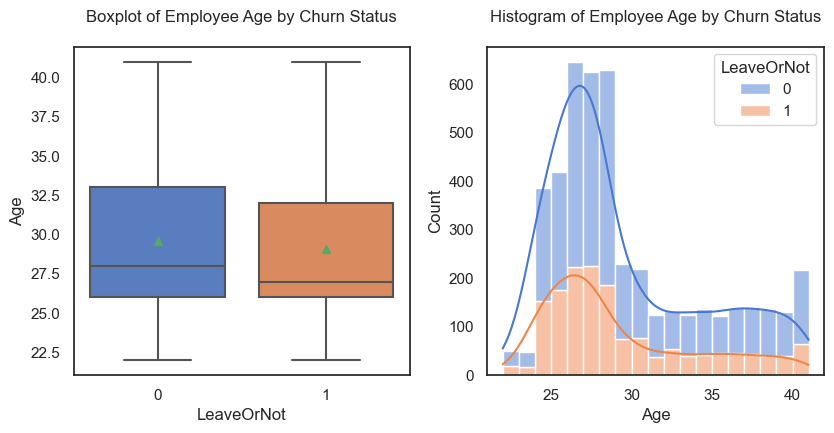

In [14]:
distribution_bivariate(df, 'LeaveOrNot', 'Age', 'LeaveOrNot', 8.5, 4.5, 'Age')

### Correlation

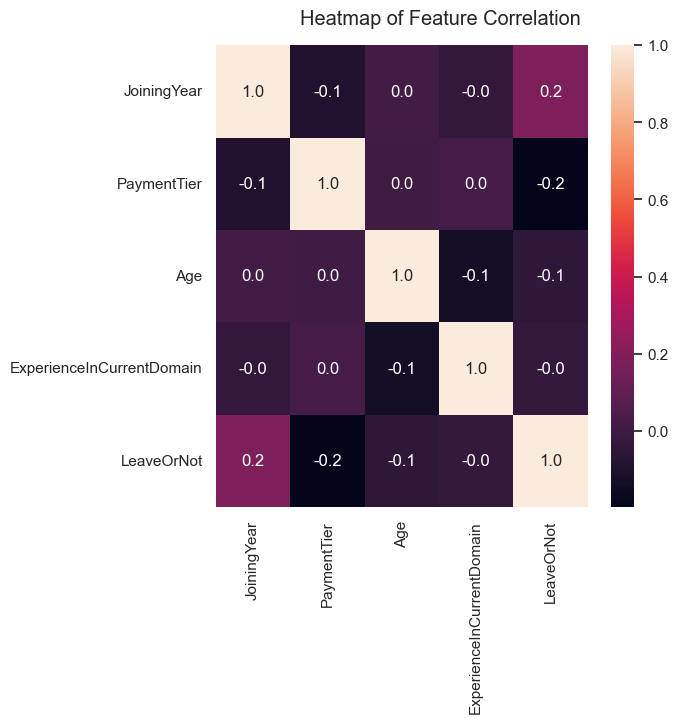

In [17]:
chart = 'Heatmap of Feature Correlation'

plt.figure(figsize=(6, 6))
plt.suptitle(f'{chart}', y=0.94)

# plot a heatmap of feature correlation
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

## Modelling

In [39]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')
    
    plt.show()

In [40]:
train=pd.read_csv('../data/processed/employee_processed.csv', encoding='utf-8')
train.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [41]:
train.shape

(4653, 9)

### Train-Test Splitting

In [42]:
sns.set_theme(style="white")

# initialize X as features and y as target
X = train.drop(['LeaveOrNot'], axis=1).values
y = train['LeaveOrNot'].values

# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [43]:
# count the occurrences of target value in
train['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [44]:
# initialize a NearMiss for undersampling
ns = NearMiss()

# perform undersampling using NearMiss and obtain the resampled dataset
print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 2137, 1: 1120})
Resample dataset shape: Counter({0: 1120, 1: 1120})


### Naive Bayes

In [45]:
# initialize the Naive Bayes classifier and fit it to the resampled training data
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.6479166666666667
ROC-AUC Score: 0.6050718704512372
Classification Report:

               precision    recall  f1-score   support

           0       0.75      0.56      0.64       916
           1       0.44      0.65      0.52       480

    accuracy                           0.59      1396
   macro avg       0.59      0.61      0.58      1396
weighted avg       0.64      0.59      0.60      1396

Confusion Matrix:

 [[515 401]
 [169 311]]


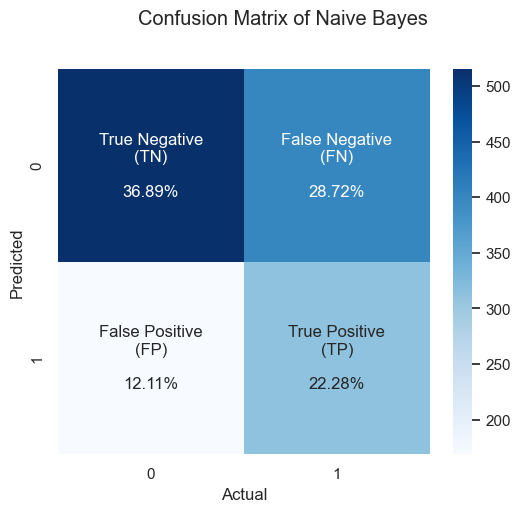

In [46]:
chart = 'Naive Bayes'

# plot the confusion matrix
plot_cm(cm, chart)

#### Cross-Validation

In [47]:
# initialize a K-Fold cross-validation object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# compute the cross-validation recall scores and ROC-AUC scores for the untuned NB classifier
nb_before_tuned_cv_recall_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", nb_before_tuned_cv_recall_scores)
print("ROC-AUC  :", nb_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Naive Bayes after a 10 fold cross validation:
Recall   : 0.6580806972152942
ROC-AUC  : 0.7780294452005132


In [48]:
print(NB_classifier.get_params())


{'priors': None, 'var_smoothing': 1e-09}


#### Hyperparameter Tuning

In [49]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_nb_recall = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_nb_rocauc = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_nb_recall.fit(X_train_resampled, y_train_resampled)
grid_nb_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc')

In [50]:
best_hyperparams_recall = grid_nb_recall.best_params_
best_hyperparams_rocauc = grid_nb_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall   :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

nb_after_tuned_cv_recall_scores = grid_nb_recall.best_score_
nb_after_tuned_cv_rocauc_scores = grid_nb_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall   :", nb_after_tuned_cv_recall_scores)
print("ROC-AUC  :", nb_after_tuned_cv_rocauc_scores)

best_nb_model = grid_nb_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall   :
 {'var_smoothing': 1e-09}
ROC-AUC  :
 {'var_smoothing': 1e-09}

The cross-validation recall and ROC-AUC score for tuned Naive Bayes after a 10 fold cross validation:
Recall   : 0.6580806972152942
ROC-AUC  : 0.7780294452005132


In [51]:
best_nb_fit_for_train_data_recall = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_nb_fit_for_train_data_rocauc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_nb_fit_for_train_data_recall)
print("ROC-AUC  :", best_nb_fit_for_train_data_rocauc)

best_nb_fit_for_test_data_recall = cross_val_score(best_nb_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_nb_fit_for_test_data_rocauc = cross_val_score(best_nb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_nb_fit_for_test_data_recall)
print("ROC-AUC  :", best_nb_fit_for_test_data_rocauc)

Train Data
Recall   : 0.6580806972152942
ROC-AUC  : 0.7780294452005132
Test Data
Recall   : 0.6775488180883864
ROC-AUC  : 0.6805755054670118


### AdaBoost

In [56]:
# initialize the Logistic Regression classifier and fit it to the resampled training data
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = DT_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.7229166666666667
ROC-AUC Score: 0.7031613901018923
Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.68      0.75       916
           1       0.54      0.72      0.62       480

    accuracy                           0.70      1396
   macro avg       0.68      0.70      0.68      1396
weighted avg       0.73      0.70      0.70      1396

Confusion Matrix:

 [[626 290]
 [133 347]]


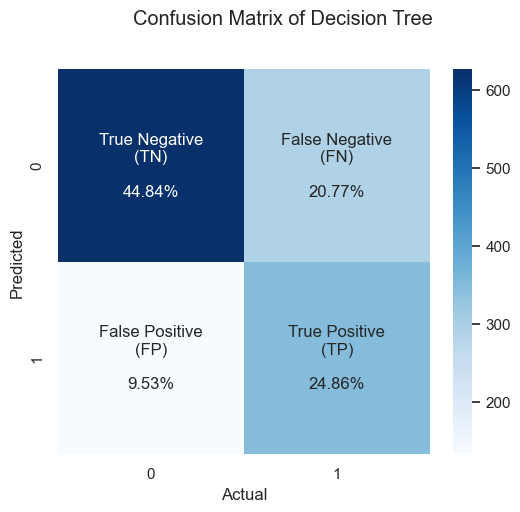

In [58]:
chart = 'Decision Tree'

# plot the confusion matrix
plot_cm(cm, chart)

#### Cross-Validation

In [59]:
# compute the cross-validation recall scores and ROC-AUC scores for the untuned DT classifier
dt_before_tuned_cv_recall_scores = cross_val_score(DT_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
dt_before_tuned_cv_rocauc_scores = cross_val_score(DT_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", dt_before_tuned_cv_recall_scores)
print("ROC-AUC  :", dt_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Decision Tree after a 10 fold cross validation:
Recall   : 0.7292780178941266
ROC-AUC  : 0.803983193698023


In [60]:
print(DT_classifier.get_params())


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


#### Hyperparameter Tuning

In [61]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_dt_recall = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_dt_rocauc = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_dt_recall.fit(X_train_resampled, y_train_resampled)
grid_dt_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [62]:
best_hyperparams_recall = grid_dt_recall.best_params_
best_hyperparams_rocauc = grid_dt_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

dt_after_tuned_cv_recall_scores = grid_dt_recall.best_score_
dt_after_tuned_cv_rocauc_scores = grid_dt_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall :", dt_after_tuned_cv_recall_scores)
print("ROC-AUC  :", dt_after_tuned_cv_rocauc_scores)

best_dt_model = grid_dt_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall :
 {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
ROC-AUC  :
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}

The cross-validation recall and ROC-AUC score for tuned Decision Tree after a 10 fold cross validation:
Recall : 0.7545657201236651
ROC-AUC  : 0.8768666924723885


In [63]:
best_dt_fit_for_train_data_recall = cross_val_score(best_dt_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_dt_fit_for_train_data_rocauc = cross_val_score(best_dt_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_dt_fit_for_train_data_recall)
print("ROC-AUC  :", best_dt_fit_for_train_data_rocauc)

best_dt_fit_for_test_data_recall = cross_val_score(best_dt_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_dt_fit_for_test_data_rocauc = cross_val_score(best_dt_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_dt_fit_for_test_data_recall)
print("ROC-AUC  :", best_dt_fit_for_test_data_rocauc)

Train Data
Recall   : 0.7536807643714527
ROC-AUC  : 0.8755853707268443
Test Data
Recall   : 0.8194707091469681
ROC-AUC  : 0.8298654540017558


### Model Evaluation

In [64]:
dict_result = {'Model' :['Naive Bayes', 'Decision Tree'],
                "Recall (train)": [best_nb_fit_for_train_data_recall, best_dt_fit_for_train_data_recall],
                "Recall (test)": [best_nb_fit_for_test_data_recall, best_dt_fit_for_test_data_recall],
                "ROC-AUC (train)": [best_nb_fit_for_train_data_rocauc, best_dt_fit_for_train_data_rocauc],
                "ROC-AUC (test)": [best_nb_fit_for_test_data_rocauc, best_dt_fit_for_test_data_rocauc]}

model_result = pd.DataFrame(dict_result).sort_values(by=['Recall (test)'], ascending= False).reset_index(drop=True)
model_result

,Model,Recall (train),Recall (test),ROC-AUC (train),ROC-AUC (test)
0,Decision Tree,0.753681,0.819471,0.875585,0.829865
1,Naive Bayes,0.658081,0.677549,0.778029,0.680576


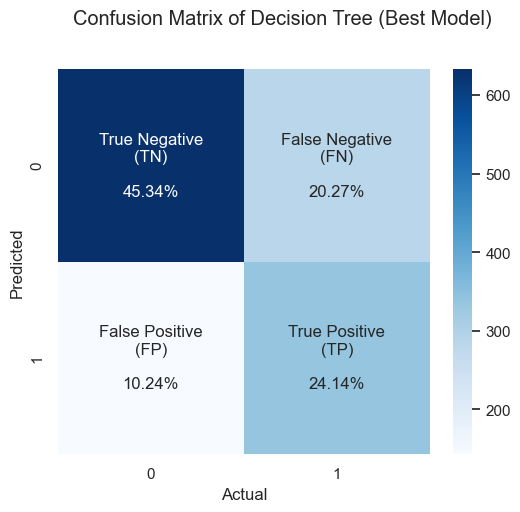

In [66]:
chart = 'Decision Tree (Best Model)'

cm = confusion_matrix(y_test, best_dt_model.predict(X_test))

plot_cm(cm, chart)

In [69]:
import pickle

filename = '../models/best_model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(best_dt_model, file)

print(f"Model saved as {filename}")


Model saved as ../models/best_model.pkl
